# 8 Queens

### Introduction

<figure>
<img src="resources/eight_queens_moves.png", width=300 align="right">
    <figcaption></figcaption>
</figure>

The [Eight Queens puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle) is a famous puzzle that has been studied extensively in- and outside of computer science. It was first published in the chess magazine _Schach_ in 1848. 

The problem can be formulated as follows: 

_"Place 8 queens on a regular (8x8) chess board such that no queen attacks any other queen."_

A queen in the game of chess can move horizontally, vertically, and diagonally. The puzzle can be solved by hand (and even [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) studied it back in 1850).

The EightQueensState class below, as well as the methods defined, should prove a helpful start for a Genetic Algorithms approach. However, you are welcome to change as little or as much of the code as is useful.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import  ipywidgets as widgets
from icecream import  ic
from typing import List

class EightQueensState:
    """This class represents a board in the eight queens puzzle"""
    N = 8 # default board size
    def __init__(self, state=None, n=N):
        """
        :param state: pass in a numpy array of integers to set the state, otherwise will be generated randomly
        :param n: only used if state is not provided, determines size of board (default: 8)
        """
        if state is None:
            self.n = n
            state = np.random.randint(0, n, n)
        else:
            self.n = len(state)
            EightQueensState.N = self.n
        self.state = state
        self.fitness = None

    @staticmethod
    def copy_replace(state, i, x):
        """This creates a copy of the state (important as numpy arrays are mutable) with column i set to x"""
        new_state = state.copy()
        new_state[i] = x
        return new_state

    @staticmethod
    def range_missing(start, stop, missing):
        """
        This creates a list of numbers with a single value missing
        e.g. range_missing(0, 8, 2) -> [0, 1, 3, 4, 5, 6, 7]
        """
        return list(range(start, missing)) + list(range(missing + 1, stop))

    def cost(self):
        """Calculates the number of pairs attacking"""
        count = 0
        for i in range(len(self.state) - 1):
            # for each queen, look in columns to the right
            # add one to the count if there is another queen in the same row
            count += (self.state[i] == np.array(self.state[i + 1:])).sum()

            # add one to the count for each queen on the upper or lower diagonal
            upper_diagonal = self.state[i] + np.arange(1, self.n - i)
            lower_diagonal = self.state[i] - np.arange(1, self.n - i)
            count += (np.array(self.state[i + 1:]) == upper_diagonal).sum()
            count += (np.array(self.state[i + 1:]) == lower_diagonal).sum()
        return count

    def neighbourhood(self):
        """This generates every state possible by changing a single queen position"""
        neighbourhood = []
        for column in range(self.n):
            for new_position in self.range_missing(0, self.n, self.state[column]):
                new_state = self.copy_replace(self.state, column, new_position)
                neighbourhood.append(EightQueensState(new_state))

        return neighbourhood

    def random_neighbour(self):
        """Generates a single random neighbour state, useful for some algorithms"""
        column = np.random.choice(range(self.n))
        new_position = np.random.choice(self.range_missing(0, self.n, self.state[column]))
        new_state = self.copy_replace(self.state, column, new_position)
        return EightQueensState(new_state)

    def is_goal(self):
        return self.cost() == 0

    def calculate_fitness(self, fitness_function):
        self.fitness = fitness_function(self.cost())
        return self.fitness

    def display(self):
        fig, ax = plt.subplots(figsize=(5, 5))

        xy = np.zeros(shape=(self.n, self.n))
        checker1 = [1 if i % 2 ==0 else 0 for i in range(self.n)]
        checker2 = [1 if i % 2 ==1 else 0 for i in range(self.n)]
        board = np.array([checker1 if i % 2 == 0 else checker2 for i in range(self.n)])
        ax.axis('off')
        ax.pcolormesh(board, cmap='gray', edgecolors='none')
        for col, row in enumerate(self.state):
            if row >= 0:  # Assuming negative values are not valid positions
                ax.text(col + 0.5, self.n - row - 0.5, 'Q', ha='center', va='center', color='red', fontsize=20)
        ax.text(0, -0.5, f'Cost: {self.cost()}', ha='left', va='center', color='black', fontsize=12)
        plt.show(fig)


    def __str__(self):
        if self.is_goal():
            return f"Goal state! {self.state}"
        else:
            return f"{self.state} cost {self.cost()}"
    def __repr__(self):
        return f"<EQS:{str(self.state.tolist())}>"

In [4]:
import math
# This function returns the worst possible score for a board size of n
def n_choose_k(n, k=2):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n-k))

# define a fitness functionn that will be passed to the generative agent
def fitness(cost, pow=math.e, n=EightQueensState.N):
    worst = n_choose_k(n, 2)       
    return (worst - cost) ** pow / worst ** pow

# plot the fitness function versus the cost function
def plot_fitnesses_with_exponent(pow):
    costs = np.arange(0, n_choose_k(EightQueensState.N)) # since 
    fitnesses = [fitness(c, pow) for c in costs]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    color = 'tab:blue'
    ax1.set_xlabel('Cost')
    ax1.set_ylabel('Cost', color=color)
    ax1.plot(costs, costs, label='Cost', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Fitness', color=color)
    ax2.plot(costs, fitnesses, label='Fitness', linestyle='--', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title(f'Cost and Fitness over Range with Exponent {pow}')
    fig.tight_layout()
    plt.show()

# Create the slider for the exponent
slider = widgets.FloatSlider(value=math.e, min=1.0, max=10.0, step=0.1, description='Exponent:')

# Display the plot with the slider
display(widgets.interactive(plot_fitnesses_with_exponent, pow=slider))


interactive(children=(FloatSlider(value=2.718281828459045, description='Exponent:', max=10.0, min=1.0), Output…

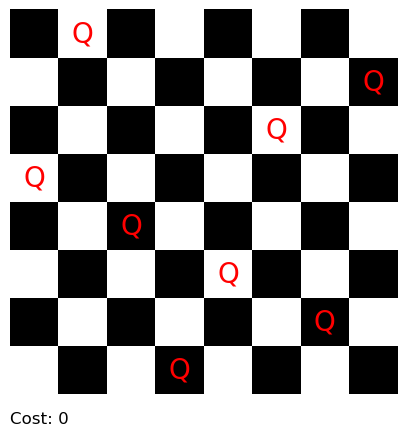

169
CPU times: total: 172 ms
Wall time: 548 ms


In [5]:
%%time
import logging
logging.basicConfig(filename='generations.log', 
                    filemode='w', 
                    level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s', 
                    datefmt='%m/%d/%Y %I:%M:%S %p')
class GA:
    def __init__(self, initial_pop, fitness_function, mutation_rate, n_generations=1):
        np.random.seed(10)
        self.shape = len(initial_pop[0].state)
        self.n_generations = n_generations
        self.fitness_function = fitness_function
        self.population = np.array(initial_pop)
        self.population_size = len(initial_pop)
        self.log = []
        self.mutation_rate = mutation_rate
        
    def generate(self):
        
        best_state = None
        found = False
        iterations = None
        for i in range(self.n_generations):
            iterations = i
            fitnesses = [state.calculate_fitness(self.fitness_function) for state in self.population]
            sorted_idx = np.argsort(fitnesses)[-1:0:-1]
            sorted_population = [self.population[i] for i in sorted_idx]
            logging.info(f"Generation {i}| F {fitnesses[0]},{fitnesses[1]}")
            if best_state is None: best_state =sorted_population[0]
            elif best_state.fitness < sorted_population[0].fitness: best_state = sorted_population[0]
            if any(state.is_goal() for state in sorted_population): 
                found = True
                break
            children = self.reproduce(sorted_population[0].state, sorted_population[1].state, self.crossover)
            logging.info(f"Generation {i}| C {str(children)}")
            self.population = [EightQueensState(child) for child in children]
            self.log.append(fitnesses[0])
        
        if found: return sorted_population[0], iterations
        else:   return best_state, iterations
    
    def reproduce(self, p1, p2, survival_function):
        sequence = [self.mutate(c) for c in survival_function(p1, p2)]
        return sequence

    def crossover(self, p1, p2):
        children = []
        for i in range(self.population_size):
            np.random.seed(None)
            cp = self.population_size//2
            children.append(np.concatenate([p1[:cp], p2[cp:]]))
        return children
    
    def mutate(self, child):
        for i in range(len(child)):
            if np.random.rand() < self.mutation_rate:
                # step size 
                child[i] = np.random.randint(0, self.shape)  
        return child
    
    def plot_loss(self):
            if not isinstance(self.log, np.ndarray):
                self.log = np.array(self.log)
            
            indices = np.arange(len(self.log))
            
            
            mask = indices % 5 == 0 
            x = indices[mask]
            y = self.log[mask]
            
            plt.figure(figsize=(10, 6))
            plt.plot(x, y, '-', label='Best Fitness per Generation') 
            plt.title('Fitness Evolution')
            plt.xlabel('Generation')
            plt.ylabel('Best Fitness')
            plt.legend()
            plt.grid(True)
            plt.show()

np.random.seed(10)
n = 8
population = np.array([EightQueensState(n=n) for i in range(10)])
fitness_func = lambda x: fitness(x, pow=math.e, n=n)
generative_agent = GA(population, fitness_function=fitness, mutation_rate=0.1, n_generations=10000)
best, iterations = generative_agent.generate()
best.display()
print(iterations)


In [7]:

# def rank(fitness:np.array, population:List[EightQueensState]):
#     ranking = fitness.argsort()[::-1]
#     ranked_pop = [population[r] for r in ranking]
#     return ranked_pop
# 
# def roulette_wheel_selection(fitness:np.array, population:List[EightQueensState]):
#     pass
# 
# def rank_space(ranked_pop:np.array, p_c:float)->np.ndarray:
#     def P(n_items, p_c):
#         # returns the probability of sampling from ranked item n where p_c is first rank probability. since these do not sum to 1, need to 
#         ps = []
#         for n in range(1, n_items+1):
#                 p = p_c * (1-p_c) ** (n-1)
#                 ps.append(p)
#         # need to normalise the probabilities so they sum to 1
#         ps = np.divide(np.array(ps), np.sum(ps)) 
#         return ps
#     probabilities = P(len(ranked_pop), p_c)
#     return probabilities
# 
# 
# def select_from_distribution(rankings, selection_probabilities):
#     states = np.array([board.state for board in rankings])
#     shp = states.shape
#     sampling_states = np.array([board.state for board in rankings]).flatten()
#     sampling_probs = np.array([np.repeat(x, shp[1]) for x in selection_probabilities]).flatten()
#     sampling_probs = np.divide(sampling_probs, np.sum(sampling_probs))
#     sampling = np.random.choice(sampling_states, 
#                                 size= len(sampling_states), 
#                                 replace=True, 
#                                 p=sampling_probs)
#     sampling.resize(shp)
#     return sampling
# 
# def mutate(sampling, threshold):
#     mutations = np.random.uniform(0., 1., size=sampling.shape)
#     mutation_mask = mutations < threshold
#     # Generate new random samples
#     new_sample = np.random.randint(0., sampling.shape[1], size=sampling.shape)
#     # Combine original sampling with new sample using the mask
#     mutated_sampling = np.where(mutation_mask, new_sample, sampling)
#     return mutated_sampling
# 
# class extGA:
#     def __init__(self, pop_size, fitness_function):
#         np.random.seed(10)
#         self.n = EightQueensState.N
#         self.pop_size = pop_size
#         self.fitness_function = fitness_function
# 
# 
#     def initialize_pop(self, pop_size:int)->list[EightQueensState]:
#         return [EightQueensState(n=self.n) for _ in range(pop_size)]
# 
#     def evolve(self, pop_size:int, n_generations:int):
#         found = False
#         i = 0
#         solutions = set()
#         population = self.initialize_pop(pop_size)
#         while not found and i < n_generations:
#             children = self.evolutionary_step(population)
#             population = children
#             solutions.union(set([eqs for eqs in children if eqs.cost() == 0]))
#             i += 1
#         return population, solutions
# 
#     @staticmethod
#     def evolutionary_step(population, mutation_rate:float = 0.1, p_c:float =0.5)-> List[EightQueensState]:   
#         costs = np.array([eqstate.cost() for eqstate in population])
#         fit = self.fitness_function(costs)
#         rankings = rank(fit, population)
#         selection_distribution = rank_space(rankings, p_c)
#         # phenotype ajustment
#         selections = select_from_distribution(rankings, selection_distribution)
#         mutated = mutate(selections, mutation_rate)
#         return [EightQueensState(ptype) for ptype in mutated]
# 
# 
# np.random.seed(10)
# fitness_func = np.vectorize(fitness)
# ga = extGA(5, fitness_function=fitness_func)
# ga.evolve(ga.pop_size, 10)

Found: 15 solutions to N=10 Queens in 10000 generations.


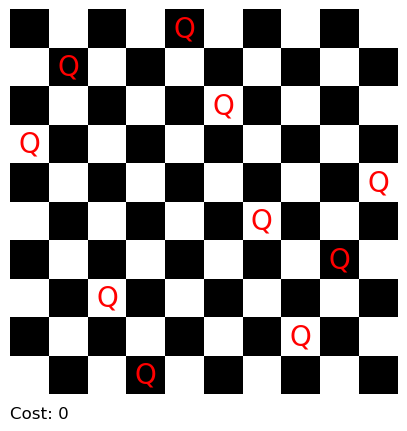

None

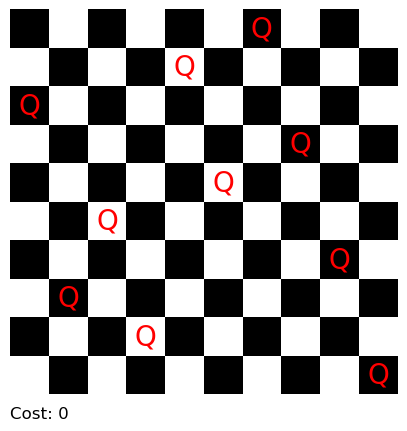

None

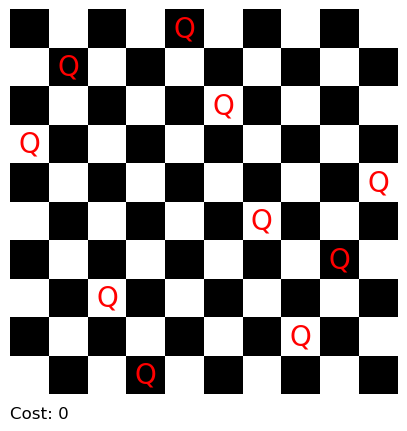

None

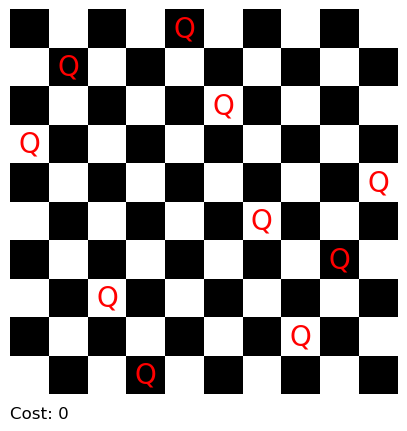

None

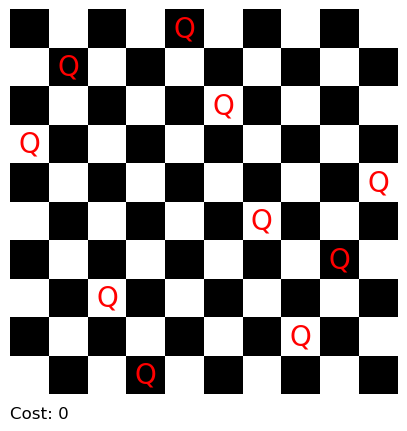

None

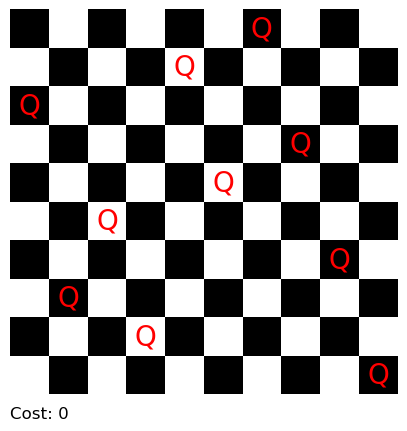

None

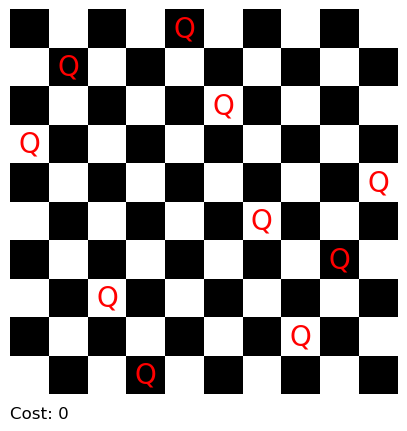

None

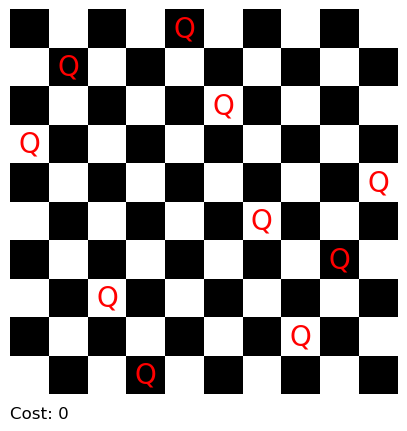

None

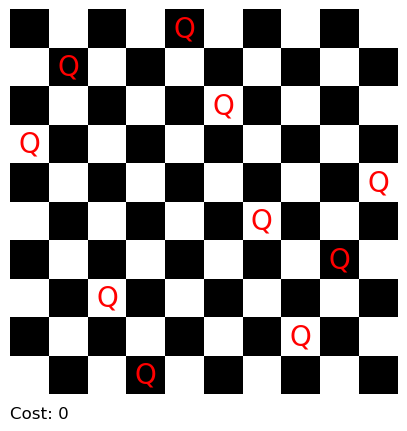

None

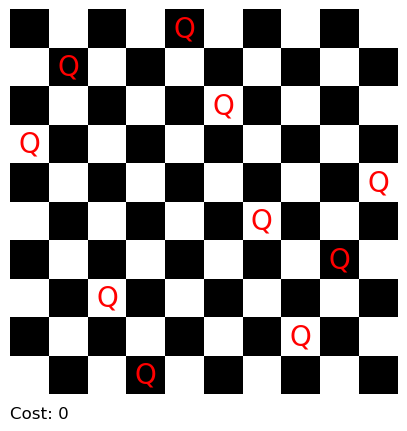

None

In [25]:
import numpy as np
from typing import List


def rank(fitness: np.array, population: List[EightQueensState]):
    ranking = fitness.argsort()[::-1]
    ranked_pop = [population[r] for r in ranking]
    return ranked_pop


def rank_space(ranked_pop: np.array, p_c: float) -> np.ndarray:
    def P(n_items, p_c):
        ps = []
        for n in range(1, n_items + 1):
            p = p_c * (1 - p_c) ** (n - 1)
            ps.append(p)
        ps = np.divide(np.array(ps), np.sum(ps))
        return ps

    probabilities = P(len(ranked_pop), p_c)
    return probabilities

def select_points_from_distribution(rankings, selection_probabilities):
    np.random.seed(None)
    states = np.array([board.state for board in rankings])
    shp = states.shape
    sampling_states = np.array([board.state for board in rankings]).flatten()
    sampling_probs = np.array([np.repeat(x, shp[1]) for x in selection_probabilities]).flatten()
    sampling_probs = np.divide(sampling_probs, np.sum(sampling_probs))
    sampling = np.random.choice(sampling_states,
                                size=len(sampling_states),
                                replace=True,
                                p=sampling_probs)
    sampling.resize(shp)
    return sampling

def select_from_distribution(rankings, selection_probabilities):
    population_size = len(rankings)
    selected_indices = np.random.choice(population_size, size=population_size, replace=True, p=selection_probabilities)
    selected_population = [rankings[i] for i in selected_indices]
    
    states = np.array([board.state for board in selected_population])
    shp = states.shape
    
    children = []
    for i in range(0, population_size, 2):
        p1 = states[i]
        p2 = states[i+1] if i+1 < population_size else states[0]
        
        np.random.seed(None)
        cp = shp[0] // 2
        child1 = np.concatenate([p1[:cp], p2[cp:]])
        child2 = np.concatenate([p2[:cp], p1[cp:]])
        
        children.append(child1)
        children.append(child2)
    
    return np.array(children)


def mutate(sampling, threshold):
    mutations = np.random.uniform(0., 1., size=sampling.shape)
    mutation_mask = mutations < threshold
    new_sample = np.random.randint(0, sampling.shape[1], size=sampling.shape)
    mutated_sampling = np.where(mutation_mask, new_sample, sampling)
    return mutated_sampling

class extGA:
    def __init__(self, N, pop_size, fitness_function):
        np.random.seed(10)
        self.n = N
        self.pop_size = pop_size
        self.fitness_function = fitness_function

    def initialize_pop(self, pop_size: int) -> List[EightQueensState]:
        return [EightQueensState(n=self.n) for _ in range(pop_size)]

    def evolve(self, pop_size: int, n_generations: int):
        found = False
        i = 0
        solutions = set()
        population = self.initialize_pop(pop_size)
        while not found and i < n_generations:
            children = self.evolutionary_step(population)
            population = children
            
            solutions = solutions.union(set([eqs for eqs in children if eqs.cost() == 0]))
            i += 1
        return population, solutions

    def evolutionary_step(self, population, mutation_rate: float = 0.2, p_c: float = 0.8) -> List[EightQueensState]:
        costs = np.array([eqstate.cost() for eqstate in population])
        fit = self.fitness_function(costs)
        rankings = rank(fit, population)
        sd = 0
        selection_distribution = rank_space(rankings, p_c) if sd==0 else roulette_wheel_selection(fit, rankings)
        selections = select_from_distribution(rankings, selection_distribution)
        mutated = mutate(selections, mutation_rate)
        return [EightQueensState(ptype) for ptype in mutated]


N = 10
generations = N * 1000
np.random.seed(10)
fitness_func = np.vectorize(fitness)
ga = extGA(N=N, pop_size=10, fitness_function=fitness_func)
population, solutions = ga.evolve(ga.pop_size, generations)

print(f"Found: {len(solutions)} solutions to N={N} Queens in {generations} generations.")
for eqs in list(solutions)[:10]:
    display(eqs.display())


[<EQS:[2, 3, 2, 6, 6, 6, 7, 1]>, <EQS:[1, 0, 6, 3, 6, 4, 7, 1]>, <EQS:[7, 6, 1, 7, 7, 6, 2, 6]>, <EQS:[3, 4, 3, 3, 5, 3, 6, 0]>, <EQS:[3, 4, 3, 3, 2, 2, 6, 7]>]


In [ ]:
def roulette_wheel_selection(fitness: np.array, ranked_pop: List[EightQueensState]):
    total_fitness = np.sum(fitness)
    selection_probs = fitness / total_fitness
    return selection_probs

def rank_space(ranked_pop: List[EightQueensState], p_c: float) -> np.ndarray:
    def P(n_items, p_c):
        ps = []
        for n in range(1, n_items + 1):
            p = p_c * (1 - p_c) ** (n - 1)
            ps.append(p)
        ps = np.divide(np.array(ps), np.sum(ps))
        return ps

    probabilities = P(len(ranked_pop), p_c)
    return probabilities

class extGA:
    def __init__(self, pop_size, fitness_function):
        np.random.seed(10)
        self.n = EightQueensState.N
        self.pop_size = pop_size
        self.fitness_function = fitness_function

    def initialize_pop(self, pop_size: int) -> List[EightQueensState]:
        return [EightQueensState(n=self.n) for _ in range(pop_size)]

    def evolve(self, pop_size: int, n_generations: int):
        found = False
        i = 0
        solutions = set()
        population = self.initialize_pop(pop_size)
        while not found and i < n_generations:
            children = self.evolutionary_step(population)
            population = children
            solutions = solutions.union(set([eqs for eqs in children if eqs.cost() == 0]))
            i += 1
        return population, solutions

    def evolutionary_step(self, population, mutation_rate: float = 0.4, p_c: float = 0.8, sd: int = 0) -> List[EightQueensState]:
        costs = np.array([eqstate.cost() for eqstate in population])
        fit = self.fitness_function(costs)
        rankings = rank(fit, population)
        selection_distribution = rank_space(rankings, p_c) if sd == 0 else roulette_wheel_selection(fit, rankings)
        selections = select_from_distribution(rankings, selection_distribution)
        mutated = mutate(selections, mutation_rate)
        return [EightQueensState(ptype) for ptype in mutated]



## Hyperparameter Grid Search

In [3]:
import itertools
run = False
def fitness_mutation_grid_search():
    grid = []
    n = 8
    t = 10
    trials = 10
    test_exponent = [x for x in np.linspace(1, 5, num=t)]
    test_mutation = [x for x in np.linspace(0.001, 0.1, num=t)]
    tests = list(itertools.product(test_exponent, test_mutation))
    np.random.seed(None)
    for exponent, mutation in tests:
        iters = []
        for _ in range(trials): 
            population = np.array([EightQueensState(n=n) for i in range(10)])
            fitness_func = lambda x: fitness(x, pow=exponent, n=n)
            generative_agent = GA(population, fitness_function=fitness_func, mutation_rate=mutation, n_generations=10000)
            best, iterations = generative_agent.generate()
            iters.append(iterations)
        grid.append((exponent, mutation, np.average(iters)))
    return grid
if run:
    G = fitness_mutation_grid_search()    

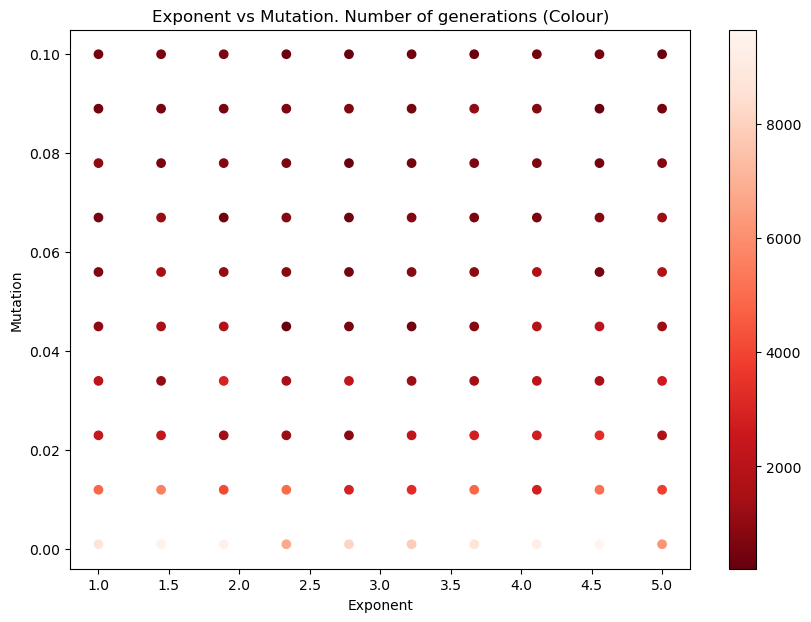

In [61]:
import matplotlib.pyplot as plt
import numpy as np
x, y, z = zip(*G)

x = np.array(x) 
y = np.array(y)  
z = np.array(z)  
z_min = np.min(z)  
z_max = np.max(z)  

plt.figure(figsize=(10, 7))
scatter = plt.scatter(x, y, c=z, cmap='Reds_r', vmin=np.min(z), vmax=np.max(z))


# Adding color bar to show mapping of color to z values
plt.colorbar(scatter)

# Adding labels and title
plt.xlabel('Exponent')
plt.ylabel('Mutation')
plt.title('Exponent vs Mutation. Number of generations (Colour)')

# Show plot
plt.show()

Thread-1: 1
Thread-2: 1
Thread-1: 2
Thread-2: 2
Thread-2: 3
Thread-1: 3
Thread-2: 4Thread-1: 4
Thread-1: 5Thread-2: 5

Done!
